In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from tqdm import tqdm

import numpy as np
import pandas as pd
import re, os, sys

import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
mpl.rcParams['pdf.fonttype'] = 42

import math

font_name = {'fontname':'Arial'}

plt.rcParams["font.family"] = "Arial"

import joblib

In [2]:
epath = r'N-LINKED_PATHWAY_STEPS_2022_YHU.xlsx'

In [3]:
e_df = pd.read_excel(epath)

/Users/yingweihu/opt/anaconda3/envs/py39_glycositeatlas/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [71]:
set(e_df['PATH'])

{'Common', 'LLO', 'N-linked'}

In [4]:
e_df

,PATH,PROTEIN,STEP,Monosaccharide
0,LLO,ALG5,1,Glucose
1,LLO,DPM1,2,Mannose
2,LLO,DPM2,2,Mannose
3,LLO,DPM3,2,Mannose
4,LLO,DOLK,3,NaN
...,...,...,...,...
123,Common,B3GALNT2,25,GalNAc
124,Common,B3GALT4,26,Galactose
125,Common,B3GALT5,26,Galactose
126,Common,CHST8,27,SO4


In [46]:
pathway_map = dict()
for index,row in e_df.iterrows():
    pathway = row['PATH']
    gene = row["PROTEIN"]
    if gene not in pathway_map:
        pathway_map[gene] = pathway

In [21]:
# get all gene symbos of glycosylation enzymes
ge = []
for index,row in e_df.iterrows():
    gene = row['PROTEIN']
    if "NOT " in gene:
        print(gene)
        continue
    if gene not in ge:
        ge.append(gene)
len(ge)

NOT IN HUMAN


111

In [5]:
notebook_dir = r"/Users/yingweihu/Documents/GitHub/GPNotebook/sample/PDAC/result/GPNotebook"

In [14]:
diff_dir = os.path.join(notebook_dir,'differential_expression_analysis')
protein_diff_obj = os.path.join(diff_dir,'Protein_Tumor_NAT_diff.joblib')

In [15]:
proteins = joblib.load(protein_diff_obj)

In [16]:
proteins

,Log2FC(median),Log2FC(mean),Wilcoxon(Unpaired)(Stats),Wilcoxon(Unpaired)(P-value),FDR,-Log10(FDR),Significance
Feature,,,,,,,
A1BG,0.388855,0.299799,6163.0,1.201356e-06,3.078894e-06,5.511605,U
A1CF,-2.141972,-1.883844,558.0,3.676212e-23,4.706633e-21,20.327290,S-D
A2M,0.370270,0.246994,5580.0,9.031652e-04,1.572591e-03,2.803384,U
A2ML1,0.343548,0.811471,4020.0,3.128045e-05,6.606685e-05,4.180016,U
AAAS,0.123939,0.184114,5812.0,8.478787e-05,1.700053e-04,3.769537,U
...,...,...,...,...,...,...,...
ZWILCH,-0.286199,-0.150161,1679.0,9.112436e-02,1.170965e-01,0.931456,None
ZYG11B,0.032523,0.060522,4068.0,2.597607e-01,3.066409e-01,0.513370,None
ZYX,0.639154,0.655666,7685.0,7.566003e-19,1.706467e-17,16.767902,U


In [75]:
ge_diff = proteins[proteins.index.isin(ge)]

In [76]:
ge_diff.head(2)

,Log2FC(median),Log2FC(mean),Wilcoxon(Unpaired)(Stats),Wilcoxon(Unpaired)(P-value),FDR,-Log10(FDR),Significance
Feature,,,,,,,
ALG1,-0.390732,-0.399962,2718.0,2.439525e-05,5.241486e-05,4.280546,D
ALG11,-0.634958,-0.514164,1955.0,1.686153e-08,5.522818e-08,7.257839,D


In [77]:
ge_diff['PATH'] = ge_diff.index.map(pathway_map)

rename_path ={
    'LLO': 'Precursor',
    'N-linked': 'Trim/Branch',
    'Common': 'Capping'
}
ge_diff['PATH'] = ge_diff['PATH'].map(rename_path)

<ipython-input-77-0af63bddc8ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ge_diff['PATH'] = ge_diff.index.map(pathway_map)
<ipython-input-77-0af63bddc8ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ge_diff['PATH'] = ge_diff['PATH'].map(rename_path)


In [78]:
ge_diff

,Log2FC(median),Log2FC(mean),Wilcoxon(Unpaired)(Stats),Wilcoxon(Unpaired)(P-value),FDR,-Log10(FDR),Significance,PATH
Feature,,,,,,,,
ALG1,-0.390732,-0.399962,2718.0,2.439525e-05,5.241486e-05,4.280546,D,Precursor
ALG11,-0.634958,-0.514164,1955.0,1.686153e-08,5.522818e-08,7.257839,D,Precursor
ALG12,-0.947084,-0.734383,1884.0,7.972952e-06,1.829534e-05,4.737660,D,Precursor
ALG13,-1.138388,-1.079445,911.0,2.654392e-19,7.154532e-18,17.145419,S-D,Precursor
ALG14,-1.661171,-1.336019,395.0,4.015960e-12,2.183819e-11,10.660783,S-D,Precursor
ALG2,-1.070062,-0.967660,929.0,4.080925e-19,1.015101e-17,16.993491,S-D,Precursor
ALG3,0.634949,0.559835,1939.0,7.199626e-03,1.103715e-02,1.957143,None,Precursor
ALG5,-1.614341,-1.423773,1105.0,2.433970e-17,3.508302e-16,15.454903,S-D,Precursor
ALG6,-0.733326,-0.755482,1189.0,6.074730e-08,1.847890e-07,6.733324,D,Precursor


In [79]:
sig_col = 'Significance'
sn_diff = ge_diff[pd.isna(ge_diff[sig_col])]
up_diff = ge_diff[ge_diff[sig_col]=='U']
down_diff = ge_diff[ge_diff[sig_col] == 'D']
su_diff = ge_diff[ge_diff[sig_col]=='S-U']
sd_diff = ge_diff[ge_diff[sig_col]=='S-D']

In [80]:
sn_diff.shape

(15, 8)

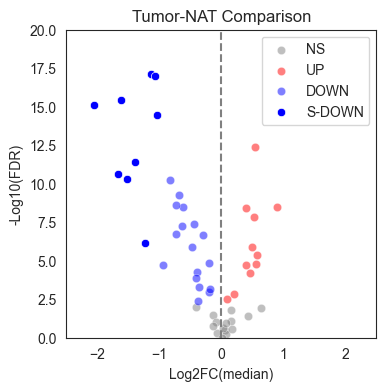

In [86]:
fig,ax = plt.subplots(figsize=(4,4))
x_col = 'Log2FC(median)'
y_col = '-Log10(FDR)'
plt.title('Tumor-NAT Comparison')
sns.scatterplot(data = sn_diff, x= x_col, y = y_col, alpha=0.5, color='grey',label='NS')
sns.scatterplot(data = up_diff, x= x_col, y = y_col, alpha=0.5, color='red',label='UP')
sns.scatterplot(data = down_diff, x= x_col, y = y_col, alpha=0.5, color='blue',label='DOWN')
sns.scatterplot(data = su_diff, x= x_col, y = y_col, alpha=1, color='red',label='S-UP')
sns.scatterplot(data = sd_diff, x= x_col, y = y_col, alpha=1, color='blue',label='S-DOWN')
plt.xlim(-2.5,2.5)
plt.ylim(0,20)
# Plot a vertical line at x = 0
plt.axvline(x=0, color='grey', linestyle='--')


In [98]:
path_id_map = {
    'Precursor':0,
    'Trim/Branch':1,
    'Capping': 2
}

ge_diff['PATH_ID'] = ge_diff['PATH'].map(path_id_map)
ge_diff = ge_diff.sort_values(['PATH_ID'])

In [99]:
ge_diff

,Log2FC(median),Log2FC(mean),Wilcoxon(Unpaired)(Stats),Wilcoxon(Unpaired)(P-value),FDR,-Log10(FDR),Significance,PATH,PATH_ID
Feature,,,,,,,,,
ALG9,-2.061311,-1.751997,1147.0,6.257405e-17,8.167461e-16,15.087913,S-D,Precursor,0
ALG5,-1.614341,-1.423773,1105.0,2.433970e-17,3.508302e-16,15.454903,S-D,Precursor,0
STT3B,-0.689225,-0.670041,1877.0,1.222175e-10,5.285768e-10,9.276892,D,Precursor,0
TUSC3,-0.378203,-0.431914,869.0,2.471039e-03,4.053677e-03,2.392151,D,Precursor,0
ALG6,-0.733326,-0.755482,1189.0,6.074730e-08,1.847890e-07,6.733324,D,Precursor,0
ALG14,-1.661171,-1.336019,395.0,4.015960e-12,2.183819e-11,10.660783,S-D,Precursor,0
ALG3,0.634949,0.559835,1939.0,7.199626e-03,1.103715e-02,1.957143,None,Precursor,0
ALG2,-1.070062,-0.967660,929.0,4.080925e-19,1.015101e-17,16.993491,S-D,Precursor,0
DAD1,-1.396119,-1.193165,1400.0,6.040597e-13,3.727104e-12,11.428628,S-D,Precursor,0


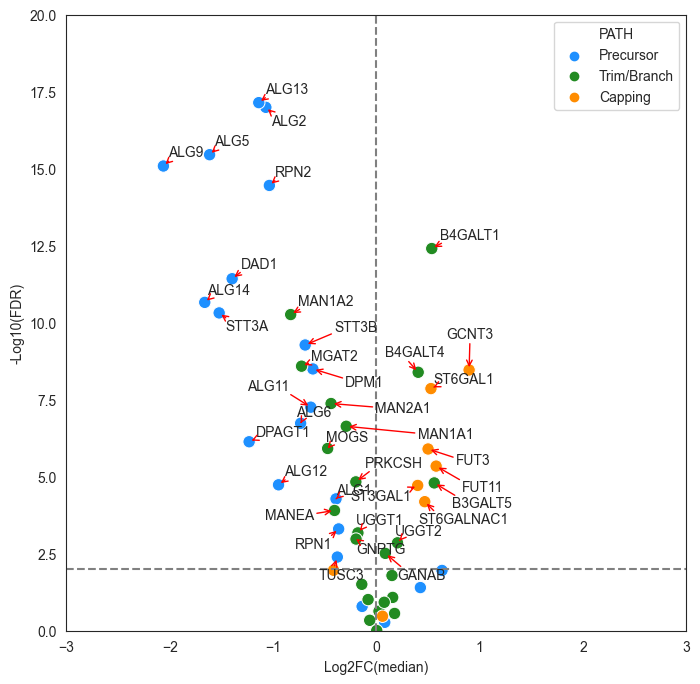

In [102]:
from adjustText import adjust_text

fdr = 0.01

# Define the color palette
palette = ['dodgerblue', 'forestgreen', 'darkorange']

fig,ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data = ge_diff, x= x_col, y=y_col,hue='PATH',s = 80, palette=palette)



# Adding labels to the points
texts = []
for index,row in ge_diff.iterrows():
    x = row[x_col]
    y = row[y_col]
#     if abs(x) < 1:
#         continue
    if abs(y) < abs(np.log10(fdr)):
        continue
#     plt.text(x,y,index)
    texts.append(plt.text(x,y,index))

# Adjusting the text
adjust_text(texts,
             expand_points=(1.5, 2),
            expand_text=(1.5, 2),
            arrowprops=dict(arrowstyle='->', color='red'))

plt.xlim(-3,3)
plt.ylim(0,20)

plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=abs(np.log10(fdr)),color='grey', linestyle='--')